In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

def get_results_file(experiment, dataset):
    
    root_path = "/home/colombelli/Documents/Experiments11_mai/" + dataset + "/"
    results_file_name = "/final_results.csv"
    complete_path = root_path + experiment + results_file_name
    return pd.read_csv(complete_path)

In [2]:
hyb_sb = get_results_file("Hyb_stb_borda", 'BRCA')
hyb_bb = get_results_file("Hyb_borda_borda", 'BRCA')
het = get_results_file("Het_borda", 'BRCA')
sin = get_results_file("sin_relieff", 'BRCA')
hom = get_results_file("Hom_borda_relieff", 'BRCA')

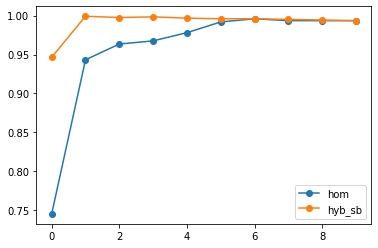

In [4]:
#plt.plot(hyb_sb['stabilities'], 'o-', label="hyb sb")
#plt.plot(hyb_bb['stabilities'], 'o-', label="hyb bb")
#plt.plot(het['mean_ACC'], 'o-', label="het")
#plt.plot(sin['stabilities'], 'o-', label="sin")
plt.plot(hom['mean_ACC'], 'o-', label="hom")
plt.plot(hyb_sb['mean_ACC'], 'o-', label="hyb_sb")
plt.legend()

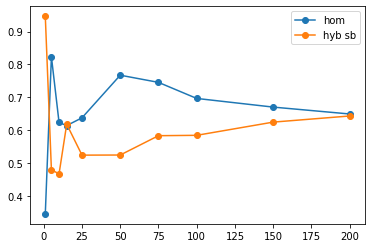

In [7]:
plt.plot(ths, hom['stabilities']+hom['mean_ACC']-1, '-o', label="hom")
plt.plot(ths, hyb_sb['stabilities']+hyb_sb['mean_ACC']-1, '-o', label="hyb sb")
plt.legend()

In [3]:
ths = hyb_sb['th_int']
ths

0      1
1      5
2     10
3     15
4     25
5     50
6     75
7    100
8    150
9    200
Name: th_int, dtype: int64

In [126]:
x = list(range(0,10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [128]:
auc(x, hom['stabilities']+hom['mean_ACC']-1)

4.665790921732571

In [129]:
auc(x, hyb_sb['stabilities']+hyb_sb['mean_ACC']-1)

5.19864563679749

In [146]:
auc(x, hyb_bb['stabilities']+hyb_bb['mean_ACC']-1)

4.907598757654326

In [134]:
auc(x, [1,1,1,1,1,1,1,1,1,1])

9.0

In [135]:
import os

In [147]:
len(hom)

10

In [6]:
experiments = ['Het_borda', 'Hom_borda_oner', 'sin_geode', 'Hyb_borda_borda', 'Hom_borda_geode', 'sin_relieff', 'sin_gr', 'sin_su', 'sin_oner', 'Hyb_stb_borda', 'Hom_borda_relieff', 'Hom_borda_gr', 'Hom_borda_su']

In [7]:
def get_tradeoff_auc(experiment, dataset):
    
    results = get_results_file(experiment, dataset)
    x = list(range(len(results)))
    y = (1 * results['mean_ROC_AUC']) + results['stabilities'] - 1
    return auc(x, y)

In [8]:
for exp in experiments:
    
    print(exp, get_tradeoff_auc(exp, "THCA"))

Het_borda 3.5007919858704177
Hom_borda_oner 3.451710317498001
sin_geode 2.925610246947529
Hyb_borda_borda 4.084050226638368
Hom_borda_geode 3.4300349002652655
sin_relieff 5.156009005082652
sin_gr 3.217821594435314
sin_su 3.2302794464202513
sin_oner 2.9614394589282265
Hyb_stb_borda 4.00025576032141
Hom_borda_relieff 4.479378904843094
Hom_borda_gr 3.350539518472343
Hom_borda_su 3.436689742805968


In [13]:
get_results_file("sin_gr", "BRCA")

,th_frac,th_int,stabilities,mean_ACC,std_ACC,mean_ROC_AUC,std_ROC_AUC,mean_PR_AUC,std_PR_AUC
0,0.007132,1,0.099936,0.929423,0.021114,0.952539,0.022644,0.994039,0.004616
1,0.035658,5,0.479814,0.995945,0.003629,0.999725,0.000381,0.999972,0.000038
2,0.071317,10,0.499643,0.996751,0.001624,0.999959,0.000081,0.999996,0.000008
3,0.106975,15,0.546181,0.997564,0.001989,0.999919,0.000162,0.999992,0.000016
4,0.178291,25,0.426978,0.996751,0.003041,0.999919,0.000162,0.999992,0.000016
5,0.356583,50,0.429967,0.995938,0.004453,0.999878,0.000244,0.999988,0.000024
6,0.534874,75,0.449053,0.995938,0.004453,0.999919,0.000162,0.999992,0.000016
7,0.713165,100,0.465186,0.995129,0.003984,0.999797,0.000406,0.999980,0.000040
8,1.069748,150,0.496615,0.992696,0.004733,0.999878,0.000244,0.999988,0.000024
9,1.426330,200,0.509503,0.992696,0.004733,0.999797,0.000406,0.999980,0.000040


In [15]:
th_transf = []

for th in ths:
    
    th_transf.append(
       1 - (math.log(th, 2) / math.log(14000, 2))
    )

In [9]:
import math

In [14]:
math.log(4,2)

2.0

In [16]:
th_transf

[1.0,
 0.8314162036673142,
 0.7588111145158072,
 0.7163398600006592,
 0.6628324073346283,
 0.5902273181831215,
 0.5477560636679734,
 0.5176222290316144,
 0.4751509745164664,
 0.4450171398801074]

In [76]:
def get_colombelli_score(experiment, dataset):
    
    results = get_results_file(experiment, dataset)
    norm_stb = (results['stabilities']+1)/2
    x = list(range(len(ths)))#th_transf
    y = list((3 * results['mean_ROC_AUC']) + norm_stb - 3)
    
    #plt.plot(x, y, '-o')
    #plt.show()
    cs = auc(x,y)
    print(experiment, cs)
    return cs

In [77]:
performance_dict = {}
for exp in experiments:
    performance_dict[exp] = get_colombelli_score(exp, "BRCA")

Het_borda 6.801090811023471
Hom_borda_oner 6.754468697275299
sin_geode 6.404301658263005
Hyb_borda_borda 6.946108977386997
Hom_borda_geode 7.018731439868288
sin_relieff 7.673018817365554
sin_gr 6.474565122463202
sin_su 6.695064256343264
sin_oner 6.792499676295457
Hyb_stb_borda 7.091475835467755
Hom_borda_relieff 7.459171564320001
Hom_borda_gr 6.604923538139413
Hom_borda_su 6.821542000844244


In [78]:
sorted(performance_dict.items(), key=lambda x: x[1], reverse=True)

[('sin_relieff', 7.673018817365554),
 ('Hom_borda_relieff', 7.459171564320001),
 ('Hyb_stb_borda', 7.091475835467755),
 ('Hom_borda_geode', 7.018731439868288),
 ('Hyb_borda_borda', 6.946108977386997),
 ('Hom_borda_su', 6.821542000844244),
 ('Het_borda', 6.801090811023471),
 ('sin_oner', 6.792499676295457),
 ('Hom_borda_oner', 6.754468697275299),
 ('sin_su', 6.695064256343264),
 ('Hom_borda_gr', 6.604923538139413),
 ('sin_gr', 6.474565122463202),
 ('sin_geode', 6.404301658263005)]

In [61]:
sorted(performance_dict.items(), key=lambda x: x[1], reverse=True)

[('sin_relieff', 0.45232452176837346),
 ('Hom_borda_geode', 0.4485473081011633),
 ('Hom_borda_relieff', 0.44567432229021425),
 ('Hyb_stb_borda', 0.44073073052222045),
 ('Hyb_borda_borda', 0.4328462360452213),
 ('Het_borda', 0.4293512788237248),
 ('sin_geode', 0.4080816587457287),
 ('Hom_borda_su', 0.4021001468805242),
 ('sin_oner', 0.39460825595508486),
 ('Hom_borda_oner', 0.39110331193648284),
 ('sin_su', 0.391079424415103),
 ('Hom_borda_gr', 0.38769149341222675),
 ('sin_gr', 0.3811834284290137)]

In [64]:
sorted(performance_dict.items(), key=lambda x: x[1], reverse=True)

[('sin_relieff', 176.23388734557653),
 ('Hom_borda_relieff', 167.99031449117808),
 ('Hyb_stb_borda', 158.30386389718393),
 ('Hom_borda_su', 156.47748864701248),
 ('Hyb_borda_borda', 155.48236683073748),
 ('sin_oner', 154.90153412724658),
 ('Hom_borda_oner', 154.70737547088086),
 ('sin_su', 152.97534756674145),
 ('Hom_borda_gr', 152.33629050596596),
 ('Hom_borda_geode', 149.34677091638957),
 ('Het_borda', 149.30108830880963),
 ('sin_gr', 145.84029742126722),
 ('sin_geode', 140.34533383165768)]

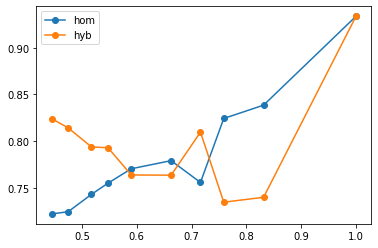

In [79]:
hom_geode = get_results_file("Hom_borda_geode", "BRCA")
hyb_sb = get_results_file("Hyb_stb_borda", "BRCA")

norm_stb_hom = (hom_geode['stabilities']+1)/2
norm_stb_hyb = (hyb_sb['stabilities']+1)/2

x = th_transf
#x = ths
#x = list(range(len(ths)))

y_hom = list((3 * hom_geode['mean_ROC_AUC']) + norm_stb_hom - 3)
y_hyb = list((3 * hyb_sb['mean_ROC_AUC']) + norm_stb_hyb - 3)


plt.plot(x, y_hom, '-o', label="hom")
plt.plot(x, y_hyb, '-o', label="hyb")
plt.legend()

In [74]:
list(ths)

[1, 5, 10, 15, 25, 50, 75, 100, 150, 200]

In [73]:
th_transf

[1.0,
 0.8314162036673142,
 0.7588111145158072,
 0.7163398600006592,
 0.6628324073346283,
 0.5902273181831215,
 0.5477560636679734,
 0.5176222290316144,
 0.4751509745164664,
 0.4450171398801074]

In [80]:
hom_geode

,th_frac,th_int,stabilities,mean_ACC,std_ACC,mean_ROC_AUC,std_ROC_AUC,mean_PR_AUC,std_PR_AUC
0,0.007132,1,1.000000,0.946437,0.018718,0.977890,0.006046,0.997871,0.000601
1,0.035658,5,0.679886,0.991070,0.003986,0.999525,0.000330,0.999952,0.000032
2,0.071317,10,0.649750,0.994316,0.004875,0.999802,0.000178,0.999980,0.000018
3,0.106975,15,0.512812,0.995129,0.003978,0.999802,0.000178,0.999980,0.000018
4,0.178291,25,0.559214,0.995942,0.003629,0.999841,0.000151,0.999984,0.000015
5,0.356583,50,0.542368,0.995938,0.004453,0.999758,0.000394,0.999976,0.000038
6,0.534874,75,0.512057,0.995125,0.004741,0.999675,0.000649,0.999969,0.000062
7,0.713165,100,0.488351,0.995125,0.003984,0.999636,0.000634,0.999965,0.000061
8,1.069748,150,0.452139,0.995125,0.004741,0.999474,0.000958,0.999949,0.000092
9,1.426330,200,0.448635,0.994316,0.004148,0.999271,0.001362,0.999930,0.000130


In [81]:
hyb_sb

,th_frac,th_int,stabilities,mean_ACC,std_ACC,mean_ROC_AUC,std_ROC_AUC,mean_PR_AUC,std_PR_AUC
0,0.007132,1,1.000000,0.946437,0.018718,0.977890,0.006046,0.997871,0.000601
1,0.035658,5,0.479814,0.999187,0.001626,1.000000,0.000000,1.000000,0.000000
2,0.071317,10,0.469622,0.997561,0.001991,0.999959,0.000081,0.999996,0.000008
3,0.106975,15,0.619593,0.998374,0.001991,0.999959,0.000081,0.999996,0.000008
4,0.178291,25,0.527157,0.996751,0.003041,1.000000,0.000000,1.000000,0.000000
5,0.356583,50,0.528318,0.995935,0.005142,0.999878,0.000244,0.999988,0.000024
6,0.534874,75,0.587125,0.995935,0.005142,0.999797,0.000406,0.999980,0.000040
7,0.713165,100,0.589069,0.995125,0.004741,0.999756,0.000487,0.999976,0.000048
8,1.069748,150,0.630042,0.994316,0.004875,0.999716,0.000568,0.999972,0.000056
9,1.426330,200,0.649500,0.993506,0.005504,0.999797,0.000406,0.999980,0.000040


In [86]:
def get_colombelli_score(experiment, dataset):
    
    results = get_results_file(experiment, dataset)
    norm_stb = (results['stabilities']+1)/2
    x = th_transf
    y = list((2 * results['mean_ROC_AUC']) + norm_stb - 2)
    
    cs = auc(x,y)
    return cs

In [91]:
performance_dict = {}
for exp in experiments:
    performance_dict[exp] = get_colombelli_score(exp, "UCEC")*100
    
    
sorted(performance_dict.items(), key=lambda x: x[1], reverse=True)

[('Hom_borda_geode', 40.50303662427186),
 ('Hom_borda_relieff', 39.60707457772783),
 ('sin_relieff', 39.46319190231621),
 ('Hyb_borda_borda', 39.16322109634878),
 ('Het_borda', 39.12815330601489),
 ('sin_geode', 37.3582087111686),
 ('Hyb_stb_borda', 35.27631867098591),
 ('Hom_borda_oner', 33.30837126115),
 ('Hom_borda_su', 33.07587001837208),
 ('Hom_borda_gr', 32.899346897964854),
 ('sin_oner', 32.644259722023236),
 ('sin_gr', 32.6072701073806),
 ('sin_su', 32.594620820946005)]